# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reading Data

In [2]:
dataset = pd.read_csv('amex_data/train_data_with_samplefeatures.csv')

In [3]:
print(dataset.shape)
dataset.head()

(948, 23)


,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,...,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,Hl Ph,12634,Hl Ph,...,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,139.000000,100.0,157.178571
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,Ed,20,Wt Is,...,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,156.000000,50.0,103.500000
2,9433269,We,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,Ne,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,We,10576,Ne,...,2023-06-02,day/night match,Vy Bt,2023,251,0.857143,0.672131,173.266667,0.0,154.333333
3,9587073,Ga An Ws,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,Bs Rs,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,Ga An Ws,36084,Ga An Ws,...,2023-09-10,day match,Cn Pr Le,2023,14300,2.166667,1.975610,164.266667,50.0,144.250000
4,9516457,Pb Ks,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,Gt Ts,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,Gt Ts,48341,Gt Ts,...,2023-04-13,night match,In Pr Le,2023,7118,0.818182,1.327869,164.666667,0.0,189.000000


# Preprocessing

## Toss winner team 1?

In [4]:
t1_toss_win = []
for i in range(0, dataset.shape[0]):
    if dataset['toss winner'][i] == dataset['team1'][i]:
        t1_toss_win.append(1)
    else:
        t1_toss_win.append(0)

In [5]:
dataset['toss winner'] = t1_toss_win # Toss winner is now a binary feature (1 if toss winner is team 1, 0 otherwise)
dataset.rename(columns={"toss winner": "t1_toss_win"}, inplace=True)

In [6]:
print(dataset.shape)
dataset.head()

(948, 23)


,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,t1_toss_win,...,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,Hl Ph,12634,0,...,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,139.000000,100.0,157.178571
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,Ed,20,0,...,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,156.000000,50.0,103.500000
2,9433269,We,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,Ne,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,We,10576,0,...,2023-06-02,day/night match,Vy Bt,2023,251,0.857143,0.672131,173.266667,0.0,154.333333
3,9587073,Ga An Ws,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,Bs Rs,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,Ga An Ws,36084,1,...,2023-09-10,day match,Cn Pr Le,2023,14300,2.166667,1.975610,164.266667,50.0,144.250000
4,9516457,Pb Ks,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,Gt Ts,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,Gt Ts,48341,0,...,2023-04-13,night match,In Pr Le,2023,7118,0.818182,1.327869,164.666667,0.0,189.000000


## Dropping other

In [7]:
dataset.drop(['team1','team2','winner'], axis=1, inplace=True)

In [8]:
print(dataset.shape)
dataset.head()

(948, 20)


,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,t1_toss_win,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9331181,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,12634,0,field,Hr Ct Sm Ie,Indore,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,139.000000,100.0,157.178571
1,8797060,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,20,0,field,Kn Ol Bn Bs,Bridgetown,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,156.000000,50.0,103.500000
2,9433269,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,10576,0,field,Tt Be Nm,Nottingham,2023-06-02,day/night match,Vy Bt,2023,251,0.857143,0.672131,173.266667,0.0,154.333333
3,9587073,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,36084,1,bat,Bn La Sm Ta Td,Tarouba,2023-09-10,day match,Cn Pr Le,2023,14300,2.166667,1.975610,164.266667,50.0,144.250000
4,9516457,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,48341,0,field,Pb Ct An IS Ba Sm Mi Ch,Chandigarh,2023-04-13,night match,In Pr Le,2023,7118,0.818182,1.327869,164.666667,0.0,189.000000


## Taking care of NA values (=0)

In [9]:
# for i in dataset.columns:
#     print("# Nulls in column", i, ': ', dataset[i].isnull().sum())

In [10]:
df = dataset.fillna(0)

## Changing date to year and dropping season

In [11]:
df.insert(10, 'year', df['match_dt'].apply(lambda x: x[0:4]))

In [12]:
df.drop(['match_dt','season'], axis=1, inplace=True)

In [13]:
print(df.shape)
df.head()

(948, 19)


,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,t1_toss_win,toss decision,venue,city,year,lighting,series_name,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9331181,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,12634,0,field,Hr Ct Sm Ie,Indore,2022,day/night match,Sd Mq Ai Ty,7398,1.666667,0.672131,139.000000,100.0,157.178571
1,8797060,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,20,0,field,Kn Ol Bn Bs,Bridgetown,2022,day/night match,Ed tr of Wt Is,1406,1.285714,1.952381,156.000000,50.0,103.500000
2,9433269,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,10576,0,field,Tt Be Nm,Nottingham,2023,day/night match,Vy Bt,251,0.857143,0.672131,173.266667,0.0,154.333333
3,9587073,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,36084,1,bat,Bn La Sm Ta Td,Tarouba,2023,day match,Cn Pr Le,14300,2.166667,1.975610,164.266667,50.0,144.250000
4,9516457,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,48341,0,field,Pb Ct An IS Ba Sm Mi Ch,Chandigarh,2023,night match,In Pr Le,7118,0.818182,1.327869,164.666667,0.0,189.000000


## Serires Name Analysis

In [14]:
check_x = []
for i in range(df['series_name'].unique().size):
    check_x.append(df['series_name'].value_counts()[i])

In [15]:
len(check_x)

85

In [16]:
df['series_name'].unique().size

85

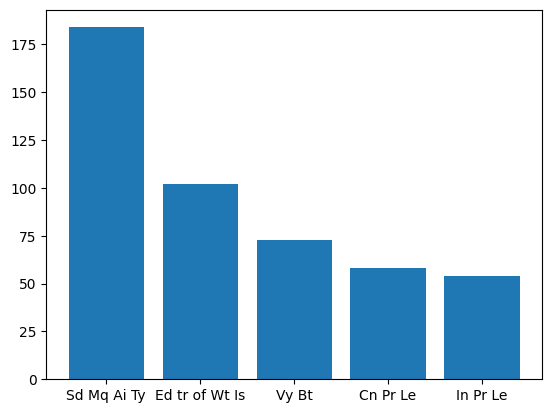

In [17]:
plt.bar(df['series_name'].unique()[0:5], check_x[0:5])
plt.show()

In [18]:
df['ground_id'].unique().size

123

In [19]:
print(df.shape)
df.head()

(948, 19)


,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,t1_toss_win,toss decision,venue,city,year,lighting,series_name,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9331181,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,12634,0,field,Hr Ct Sm Ie,Indore,2022,day/night match,Sd Mq Ai Ty,7398,1.666667,0.672131,139.000000,100.0,157.178571
1,8797060,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,20,0,field,Kn Ol Bn Bs,Bridgetown,2022,day/night match,Ed tr of Wt Is,1406,1.285714,1.952381,156.000000,50.0,103.500000
2,9433269,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,10576,0,field,Tt Be Nm,Nottingham,2023,day/night match,Vy Bt,251,0.857143,0.672131,173.266667,0.0,154.333333
3,9587073,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,36084,1,bat,Bn La Sm Ta Td,Tarouba,2023,day match,Cn Pr Le,14300,2.166667,1.975610,164.266667,50.0,144.250000
4,9516457,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,48341,0,field,Pb Ct An IS Ba Sm Mi Ch,Chandigarh,2023,night match,In Pr Le,7118,0.818182,1.327869,164.666667,0.0,189.000000


## Team 1 batting first?

In [20]:
t1_bat_first = []

In [21]:
for i in range(df['toss decision'].size):
    if df['toss decision'][i] == 'bat':
        if df['t1_toss_win'][i] == 1:
            t1_bat_first.append(1)
        if df['t1_toss_win'][i] == 0:
            t1_bat_first.append(0)

    if df['toss decision'][i] == 'field':
        if df['t1_toss_win'][i] == 1:
            t1_bat_first.append(0)
        if df['t1_toss_win'][i] == 0:
            t1_bat_first.append(1)

In [22]:
df.insert(6, 't1_batting_first', t1_bat_first)
df.drop(['toss decision'], axis=1, inplace=True) 

In [23]:
print(df.shape)
df.head()

(948, 19)


,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,t1_batting_first,t1_toss_win,venue,city,year,lighting,series_name,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9331181,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,12634,1,0,Hr Ct Sm Ie,Indore,2022,day/night match,Sd Mq Ai Ty,7398,1.666667,0.672131,139.000000,100.0,157.178571
1,8797060,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,20,1,0,Kn Ol Bn Bs,Bridgetown,2022,day/night match,Ed tr of Wt Is,1406,1.285714,1.952381,156.000000,50.0,103.500000
2,9433269,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,10576,1,0,Tt Be Nm,Nottingham,2023,day/night match,Vy Bt,251,0.857143,0.672131,173.266667,0.0,154.333333
3,9587073,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,36084,1,1,Bn La Sm Ta Td,Tarouba,2023,day match,Cn Pr Le,14300,2.166667,1.975610,164.266667,50.0,144.250000
4,9516457,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,48341,1,0,Pb Ct An IS Ba Sm Mi Ch,Chandigarh,2023,night match,In Pr Le,7118,0.818182,1.327869,164.666667,0.0,189.000000


## Team 1 win or no

In [24]:
t1_win = []

In [25]:
for i in range(df['t1_batting_first'].size):
    if df['team1_id'][i] == df['winner_id'][i]:
        t1_win.append(1)
    else:
        t1_win.append(0)

In [26]:
df.insert(6, 't1_win', t1_win)

In [27]:
print(df.shape)
df.head()

(948, 20)


,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,t1_win,t1_batting_first,t1_toss_win,venue,city,year,lighting,series_name,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9331181,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,12634,0,1,0,Hr Ct Sm Ie,Indore,2022,day/night match,Sd Mq Ai Ty,7398,1.666667,0.672131,139.000000,100.0,157.178571
1,8797060,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,20,1,1,0,Kn Ol Bn Bs,Bridgetown,2022,day/night match,Ed tr of Wt Is,1406,1.285714,1.952381,156.000000,50.0,103.500000
2,9433269,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,10576,1,1,0,Tt Be Nm,Nottingham,2023,day/night match,Vy Bt,251,0.857143,0.672131,173.266667,0.0,154.333333
3,9587073,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,36084,1,1,1,Bn La Sm Ta Td,Tarouba,2023,day match,Cn Pr Le,14300,2.166667,1.975610,164.266667,50.0,144.250000
4,9516457,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,48341,0,1,0,Pb Ct An IS Ba Sm Mi Ch,Chandigarh,2023,night match,In Pr Le,7118,0.818182,1.327869,164.666667,0.0,189.000000


## Test 1 Prep

In [28]:
df.drop(['venue', 'city', 'lighting', 'series_name', 'team1_roster_ids', 'team2_roster_ids', 'ground_id'], axis=1, inplace=True)

In [29]:
print(df.shape)
df.head()

(948, 13)


,match id,team1_id,team2_id,winner_id,t1_win,t1_batting_first,t1_toss_win,year,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9331181,11283,12634,12634,0,1,0,2022,1.666667,0.672131,139.000000,100.0,157.178571
1,8797060,20,41,20,1,1,0,2022,1.285714,1.952381,156.000000,50.0,103.500000
2,9433269,10576,8987,10576,1,1,0,2023,0.857143,0.672131,173.266667,0.0,154.333333
3,9587073,36084,36070,36084,1,1,1,2023,2.166667,1.975610,164.266667,50.0,144.250000
4,9516457,30407,48341,48341,0,1,0,2023,0.818182,1.327869,164.666667,0.0,189.000000


In [30]:
# df.columns.get_loc('ground_id')

In [31]:
# X = df.iloc[:, -5:].values
X = df.iloc[:, 5:].values
y = df.iloc[:, 4].values

# Model Training

## Train Test split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training

In [33]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.009153
0:	learn: 0.6921012	total: 112ms	remaining: 1m 51s
1:	learn: 0.6911235	total: 113ms	remaining: 56.6s
2:	learn: 0.6900934	total: 115ms	remaining: 38.4s
3:	learn: 0.6891066	total: 117ms	remaining: 29.2s
4:	learn: 0.6882958	total: 119ms	remaining: 23.7s
5:	learn: 0.6875017	total: 121ms	remaining: 20s
6:	learn: 0.6868059	total: 122ms	remaining: 17.4s
7:	learn: 0.6861067	total: 124ms	remaining: 15.4s
8:	learn: 0.6852415	total: 126ms	remaining: 13.8s
9:	learn: 0.6846951	total: 127ms	remaining: 12.6s
10:	learn: 0.6839233	total: 129ms	remaining: 11.6s
11:	learn: 0.6830022	total: 131ms	remaining: 10.8s
12:	learn: 0.6821466	total: 132ms	remaining: 10s
13:	learn: 0.6811819	total: 134ms	remaining: 9.43s
14:	learn: 0.6802524	total: 136ms	remaining: 8.92s
15:	learn: 0.6795012	total: 138ms	remaining: 8.47s
16:	learn: 0.6786102	total: 139ms	remaining: 8.07s
17:	learn: 0.6776771	total: 141ms	remaining: 7.7s
18:	learn: 0.6772626	total: 143ms	remaining: 7.37s
19:	learn: 0.67

## Accuracy Score

In [34]:
from sklearn.feature_selection import chi2
chi2_stats, p_values = chi2(X, y)

In [35]:
((chi2_stats/(chi2_stats.sum()))*100)

array([0.00000000e+00, 4.25656324e-01, 3.43026009e-05, 6.23459854e+00,
       4.21424302e+00, 8.62017475e+00, 6.56644923e+01, 1.48408008e+01])

In [36]:
p_values

array([1.00000000e+00, 4.12630799e-01, 9.94131885e-01, 1.71576534e-03,
       9.94152204e-03, 2.27035378e-04, 2.54564115e-24, 1.31433257e-06])

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[44 48]
 [51 47]]


0.4789473684210526

## Cross validation score

In [38]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Learning rate set to 0.008749
0:	learn: 0.6921115	total: 2.05ms	remaining: 2.05s
1:	learn: 0.6906268	total: 3.65ms	remaining: 1.82s
2:	learn: 0.6897722	total: 5.42ms	remaining: 1.8s
3:	learn: 0.6888745	total: 7.11ms	remaining: 1.77s
4:	learn: 0.6879720	total: 8.63ms	remaining: 1.72s
5:	learn: 0.6871761	total: 10.3ms	remaining: 1.7s
6:	learn: 0.6865972	total: 11.8ms	remaining: 1.67s
7:	learn: 0.6859881	total: 13.3ms	remaining: 1.65s
8:	learn: 0.6858055	total: 14.3ms	remaining: 1.57s
9:	learn: 0.6847530	total: 15.8ms	remaining: 1.56s
10:	learn: 0.6839418	total: 17.6ms	remaining: 1.58s
11:	learn: 0.6834140	total: 19.1ms	remaining: 1.57s
12:	learn: 0.6826149	total: 20.7ms	remaining: 1.57s
13:	learn: 0.6821858	total: 22.3ms	remaining: 1.57s
14:	learn: 0.6814363	total: 23.9ms	remaining: 1.57s
15:	learn: 0.6808297	total: 25.5ms	remaining: 1.57s
16:	learn: 0.6799656	total: 27.1ms	remaining: 1.57s
17:	learn: 0.6786544	total: 28.7ms	remaining: 1.57s
18:	learn: 0.6779757	total: 30.1ms	remaining: 

# Test Data

In [39]:
dataset_test = pd.read_csv('amex_data/test_data_with_samplefeatures.csv')

In [40]:
print(dataset_test.shape)
dataset_test.head()

(271, 21)


,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,...,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:259025...,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:161387...,Ud Ss of Aa,field,Bo Ac Cb,...,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,NaN,0.00,NaN
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188...,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:315072...,Ja Ts,field,Pe Sm Ga,...,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,151.285714,66.67,153.500
2,9128776,Rn Rs,30428,8058959.0:2162782.0:2981614.0:7833195.0:755605...,Lw Sr Gs,48334,2654014.0:2954769.0:8058903.0:3479860.0:329940...,Rn Rs,bat,Be Sm Mi,...,2022-05-15,night match,In Pr Le,2022,2764,0.842105,0.753086,171.066667,100.00,179.625
3,9586919,Ja Ts,36098,4690258.0:8464385.0:1613898.0:5744780.0:315072...,St La Ks,36112,2331475.0:313809.0:391103.0:2742837.0:2097017....,St La Ks,field,Dn Sy Nl Ct Sm Gs It St La,...,2023-08-16,night match,Cn Pr Le,2023,11892,0.285714,1.487805,166.000000,75.00,155.500
4,9128538,Ci Sr Ks,30414,7422673.0:249087.0:62432.0:232000.0:5001170.0:...,Gt Ts,48341,1958683.0:7491224.0:3339160.0:5452754.0:225245...,Gt Ts,field,Ma Ct An Sm Pe,...,2022-04-17,night match,In Pr Le,2022,18752,2.375000,0.310330,169.933333,0.00,164.125


## Toss Winner = Team 1?

In [41]:
t1_toss_win_test = []
for i in range(0, dataset_test.shape[0]):
    if dataset_test['toss winner'][i] == dataset_test['team1'][i]:
        t1_toss_win_test.append(1)
    else:
        t1_toss_win_test.append(0)

dataset_test['toss winner'] = t1_toss_win_test
dataset_test.rename(columns={"toss winner": "t1_toss_win"}, inplace=True)

In [42]:
print(dataset_test.shape)
dataset_test.head()

(271, 21)


,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,t1_toss_win,toss decision,venue,...,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:259025...,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:161387...,0,field,Bo Ac Cb,...,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,NaN,0.00,NaN
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188...,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:315072...,0,field,Pe Sm Ga,...,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,151.285714,66.67,153.500
2,9128776,Rn Rs,30428,8058959.0:2162782.0:2981614.0:7833195.0:755605...,Lw Sr Gs,48334,2654014.0:2954769.0:8058903.0:3479860.0:329940...,1,bat,Be Sm Mi,...,2022-05-15,night match,In Pr Le,2022,2764,0.842105,0.753086,171.066667,100.00,179.625
3,9586919,Ja Ts,36098,4690258.0:8464385.0:1613898.0:5744780.0:315072...,St La Ks,36112,2331475.0:313809.0:391103.0:2742837.0:2097017....,0,field,Dn Sy Nl Ct Sm Gs It St La,...,2023-08-16,night match,Cn Pr Le,2023,11892,0.285714,1.487805,166.000000,75.00,155.500
4,9128538,Ci Sr Ks,30414,7422673.0:249087.0:62432.0:232000.0:5001170.0:...,Gt Ts,48341,1958683.0:7491224.0:3339160.0:5452754.0:225245...,0,field,Ma Ct An Sm Pe,...,2022-04-17,night match,In Pr Le,2022,18752,2.375000,0.310330,169.933333,0.00,164.125


## Dropping Names

In [43]:
dataset_test.drop(['team1','team2'], axis=1, inplace=True)

In [44]:
print(dataset_test.shape)
dataset_test.head()

(271, 19)


,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,t1_toss_win,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9250275,28594,7438955.0:8271969.0:8369661.0:3685247.0:259025...,90,2436944.0:8117500.0:6703528.0:3010748.0:161387...,0,field,Bo Ac Cb,Bulawayo,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,NaN,0.00,NaN
1,9262189,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188...,36098,4690258.0:3761246.0:8464385.0:5742470.0:315072...,0,field,Pe Sm Ga,Providence,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,151.285714,66.67,153.500
2,9128776,30428,8058959.0:2162782.0:2981614.0:7833195.0:755605...,48334,2654014.0:2954769.0:8058903.0:3479860.0:329940...,1,bat,Be Sm Mi,Mumbai,2022-05-15,night match,In Pr Le,2022,2764,0.842105,0.753086,171.066667,100.00,179.625
3,9586919,36098,4690258.0:8464385.0:1613898.0:5744780.0:315072...,36112,2331475.0:313809.0:391103.0:2742837.0:2097017....,0,field,Dn Sy Nl Ct Sm Gs It St La,Gros Islet,2023-08-16,night match,Cn Pr Le,2023,11892,0.285714,1.487805,166.000000,75.00,155.500
4,9128538,30414,7422673.0:249087.0:62432.0:232000.0:5001170.0:...,48341,1958683.0:7491224.0:3339160.0:5452754.0:225245...,0,field,Ma Ct An Sm Pe,Pune,2022-04-17,night match,In Pr Le,2022,18752,2.375000,0.310330,169.933333,0.00,164.125


## NA values to 0

In [45]:
df_test = dataset_test.fillna(0)

In [46]:
print(df_test.shape)
df_test.head()

(271, 19)


,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,t1_toss_win,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9250275,28594,7438955.0:8271969.0:8369661.0:3685247.0:259025...,90,2436944.0:8117500.0:6703528.0:3010748.0:161387...,0,field,Bo Ac Cb,Bulawayo,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,0.000000,0.00,0.000
1,9262189,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188...,36098,4690258.0:3761246.0:8464385.0:5742470.0:315072...,0,field,Pe Sm Ga,Providence,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,151.285714,66.67,153.500
2,9128776,30428,8058959.0:2162782.0:2981614.0:7833195.0:755605...,48334,2654014.0:2954769.0:8058903.0:3479860.0:329940...,1,bat,Be Sm Mi,Mumbai,2022-05-15,night match,In Pr Le,2022,2764,0.842105,0.753086,171.066667,100.00,179.625
3,9586919,36098,4690258.0:8464385.0:1613898.0:5744780.0:315072...,36112,2331475.0:313809.0:391103.0:2742837.0:2097017....,0,field,Dn Sy Nl Ct Sm Gs It St La,Gros Islet,2023-08-16,night match,Cn Pr Le,2023,11892,0.285714,1.487805,166.000000,75.00,155.500
4,9128538,30414,7422673.0:249087.0:62432.0:232000.0:5001170.0:...,48341,1958683.0:7491224.0:3339160.0:5452754.0:225245...,0,field,Ma Ct An Sm Pe,Pune,2022-04-17,night match,In Pr Le,2022,18752,2.375000,0.310330,169.933333,0.00,164.125


## date to year

In [47]:
df_test.insert(9, 'year', df_test['match_dt'].apply(lambda x: x[0:4]))

In [48]:
df_test.drop(['match_dt','season'], axis=1, inplace=True)

In [49]:
print(df_test.shape)
df_test.head()

(271, 18)


,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,t1_toss_win,toss decision,venue,city,year,lighting,series_name,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9250275,28594,7438955.0:8271969.0:8369661.0:3685247.0:259025...,90,2436944.0:8117500.0:6703528.0:3010748.0:161387...,0,field,Bo Ac Cb,Bulawayo,2022,day match,Ud Ss of Aa tr of Ze,3226,0.000000,0.019608,0.000000,0.00,0.000
1,9262189,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188...,36098,4690258.0:3761246.0:8464385.0:5742470.0:315072...,0,field,Pe Sm Ga,Providence,2022,night match,Cn Pr Le,13915,0.615385,0.344262,151.285714,66.67,153.500
2,9128776,30428,8058959.0:2162782.0:2981614.0:7833195.0:755605...,48334,2654014.0:2954769.0:8058903.0:3479860.0:329940...,1,bat,Be Sm Mi,Mumbai,2022,night match,In Pr Le,2764,0.842105,0.753086,171.066667,100.00,179.625
3,9586919,36098,4690258.0:8464385.0:1613898.0:5744780.0:315072...,36112,2331475.0:313809.0:391103.0:2742837.0:2097017....,0,field,Dn Sy Nl Ct Sm Gs It St La,Gros Islet,2023,night match,Cn Pr Le,11892,0.285714,1.487805,166.000000,75.00,155.500
4,9128538,30414,7422673.0:249087.0:62432.0:232000.0:5001170.0:...,48341,1958683.0:7491224.0:3339160.0:5452754.0:225245...,0,field,Ma Ct An Sm Pe,Pune,2022,night match,In Pr Le,18752,2.375000,0.310330,169.933333,0.00,164.125


## T1 Batting First?

In [50]:
t1_bat_first_test = []

In [51]:
for i in range(df_test['toss decision'].size):
    if df_test['toss decision'][i] == 'bat':
        if df_test['t1_toss_win'][i] == 1:
            t1_bat_first_test.append(1)
        if df_test['t1_toss_win'][i] == 0:
            t1_bat_first_test.append(0)

    if df_test['toss decision'][i] == 'field':
        if df_test['t1_toss_win'][i] == 1:
            t1_bat_first_test.append(0)
        if df_test['t1_toss_win'][i] == 0:
            t1_bat_first_test.append(1)

In [52]:
df_test.insert(5, 't1_batting_first', t1_bat_first_test)
df_test.drop(['toss decision'], axis=1, inplace=True) 

In [53]:
print(df_test.shape)
df_test.head()

(271, 18)


,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,t1_batting_first,t1_toss_win,venue,city,year,lighting,series_name,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9250275,28594,7438955.0:8271969.0:8369661.0:3685247.0:259025...,90,2436944.0:8117500.0:6703528.0:3010748.0:161387...,1,0,Bo Ac Cb,Bulawayo,2022,day match,Ud Ss of Aa tr of Ze,3226,0.000000,0.019608,0.000000,0.00,0.000
1,9262189,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188...,36098,4690258.0:3761246.0:8464385.0:5742470.0:315072...,1,0,Pe Sm Ga,Providence,2022,night match,Cn Pr Le,13915,0.615385,0.344262,151.285714,66.67,153.500
2,9128776,30428,8058959.0:2162782.0:2981614.0:7833195.0:755605...,48334,2654014.0:2954769.0:8058903.0:3479860.0:329940...,1,1,Be Sm Mi,Mumbai,2022,night match,In Pr Le,2764,0.842105,0.753086,171.066667,100.00,179.625
3,9586919,36098,4690258.0:8464385.0:1613898.0:5744780.0:315072...,36112,2331475.0:313809.0:391103.0:2742837.0:2097017....,1,0,Dn Sy Nl Ct Sm Gs It St La,Gros Islet,2023,night match,Cn Pr Le,11892,0.285714,1.487805,166.000000,75.00,155.500
4,9128538,30414,7422673.0:249087.0:62432.0:232000.0:5001170.0:...,48341,1958683.0:7491224.0:3339160.0:5452754.0:225245...,1,0,Ma Ct An Sm Pe,Pune,2022,night match,In Pr Le,18752,2.375000,0.310330,169.933333,0.00,164.125


## To predict now

In [54]:
df_test.drop(['venue', 'city', 'lighting', 'series_name', 'team1_roster_ids', 'team2_roster_ids', 'ground_id'], axis=1, inplace=True)

In [55]:
print(df_test.shape)
df_test.head()

(271, 11)


,match id,team1_id,team2_id,t1_batting_first,t1_toss_win,year,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9250275,28594,90,1,0,2022,0.000000,0.019608,0.000000,0.00,0.000
1,9262189,36084,36098,1,0,2022,0.615385,0.344262,151.285714,66.67,153.500
2,9128776,30428,48334,1,1,2022,0.842105,0.753086,171.066667,100.00,179.625
3,9586919,36098,36112,1,0,2023,0.285714,1.487805,166.000000,75.00,155.500
4,9128538,30414,48341,1,0,2022,2.375000,0.310330,169.933333,0.00,164.125


In [56]:
X_pred = df_test.iloc[:, 3:].values
# X_pred = df_test.iloc[:, -5:].values

In [57]:
y_pred_test = classifier.predict(X_pred)

# Preparing Submission File

## X final

In [58]:
X_final = np.concatenate((X_pred, X), axis=0)

## Y final

In [59]:
y_pred_train = classifier.predict(X)

In [60]:
y_final_train = []
for i in range(y_pred_train.size):
    if y_pred_train[i] == 1:
        y_final_train.append(df['team1_id'][i])
    else:
        y_final_train.append(df['team2_id'][i])

In [61]:
y_final_test = []
for i in range(y_pred_test.size):
    if y_pred_test[i] == 1:
        y_final_test.append(df_test['team1_id'][i])

    else:
        y_final_test.append(df_test['team2_id'][i])

In [62]:
y_final = np.concatenate((y_final_test, y_final_train), axis=0)
y_final.shape

(1219,)

## Match ID

In [63]:
match_id = list(df_test['match id'])
match_id.extend(df['match id'])
match_id = np.array(match_id)
match_id

array([9250275, 9262189, 9128776, ..., 9097227, 9516695, 9433633])

## Dataset Type

In [64]:
dataset_type = []
for i in range(len(y_final_test)):
    dataset_type.append('r1')

for i in range(len(y_final_train)):
    dataset_type.append('train')

dataset_type = np.array(dataset_type)

## Win Pred Score

In [65]:
win_score = []
for i in range(len(y_final)):
    win_score.append(max(classifier.predict_proba(X_final[i])))

win_score = np.array(win_score)

In [66]:
win_score

array([0.85774903, 0.58557117, 0.61740285, ..., 0.82397558, 0.64453317,
       0.64472076])

## Train algorithm

In [67]:
algo = "catboost"
train_algo = []
for i in range(len(y_final)):
    train_algo.append(algo)

train_algo = np.array(train_algo)

In [68]:
train_algo

array(['catboost', 'catboost', 'catboost', ..., 'catboost', 'catboost',
       'catboost'], dtype='<U8')

## Is Ensemble

In [69]:
ensemble = "no"
is_ensemble = []
for i in range(len(y_final)):
    is_ensemble.append(ensemble)

is_ensemble = np.array(is_ensemble)

In [70]:
classifier.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'class_names': [0, 1],
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'Logloss',
 'learning_rate': 0.00915300

## Train hps hyperparameters

In [71]:
trees = 1000
train_hps_trees = []
for i in range(len(y_final)):
    train_hps_trees.append(trees)

train_hps_trees = np.array(train_hps_trees)

In [72]:
depth = 6
train_hps_depth = []
for i in range(len(y_final)):
    train_hps_depth.append(depth)

train_hps_depth = np.array(train_hps_depth)

In [73]:
lr = 0.009153000079095364
train_hps_lr = []
for i in range(len(y_final)):
    train_hps_lr.append(lr)

train_hps_lr = np.array(train_hps_lr)

In [74]:
zeroz = np.zeros((len(y_final), 1))

## Creating Dictionary

In [75]:
dict = {'match id': match_id, 
        'dataset_type': dataset_type, 
        'win_pred_team_id': y_final, 
        'win_pred_score' : win_score, 
        'train_algorithm' : train_algo, 
        'is_ensemble': is_ensemble, 
        'train_hps_trees' : train_hps_trees, 
        'train_hps_depth' : train_hps_depth, 
        'train_hps_lr' : train_hps_lr, 
        'indep_feat_id1': X_final[:, 2], 
        'indep_feat_id2' : X_final[:, 3],
        'indep_feat_id3' : X_final[:, 4],
        'indep_feat_id4' : X_final[:, 5],
        'indep_feat_id5' : X_final[:, 6],
        'indep_feat_id6' : zeroz[:, 0], 
        'indep_feat_id7' : zeroz[:, 0], 
        'indep_feat_id8' : zeroz[:, 0], 
        'indep_feat_id9' : zeroz[:, 0], 
        'indep_feat_id10' : zeroz[:, 0]}

## Wriritng to CSV

In [76]:
df_out = pd.DataFrame(dict)

In [77]:
df_out.to_csv('submission_file1.csv',index=False)